# 2021/9/22(Wed) 実習

ToDo List
1. アンテナの固定
2. 場所ぎめ
3. 磁場のアラインメント
4. Rabi振動($\pi$パルス決定)
5. Hahn Echo

このノートでは、断りなく第66回物性若手夏の学校(2021年度)の佐々木さんのグラフ等を用いることがあります。あらかじめご了承ください。

## Task 1. 
### GUI 起動
<img src = "figure/fig0.PNG" width = 300 height = 200>


Main GUI の起動を行う。
ここから、[Start and Reset]をクリック。
このツールは、ステージ、z軸のpiezoの初期化を行う。その他GPIBなど測定機器のMATLAB上の仮想デバイスの再構築も行われる。これにより位置がずれることがある。初回起動と再起動を兼ねているのでStart / Resetらしい。

通常、機器に対する命令にバグがあるなどしてアプリケーションがエラーを吐いた場合はまず隣のClose Deviceを試そう。

## Task 2.
ワイヤーを探す。
MAP アプリケーションを用いる。
まず、Z = 40µmにし、表面のフォーカスを探す。フォーカス位置がZ=40µm程度になることが必要。
うまく表面にあえばこんな感じ.

<img src = "figure/fig2.PNG" width = 400>

次に、
1. (X)2000µm x (Y)2000µm程度の広いXYマップで影(暗い領域)を探す
2. (Y) 1000µm x (Z) 100µm程度?のYZマップでワイヤーの断面を探す。

のいずれかを行いワイヤーの位置を特定する。基本は1で見えるが、ワイヤーが浮いているときは2. を行う。

<img src = "figure/fig3.PNG" width = 400>

XY Map でこんな感じに影が見えるはず.表面が暗い(綺麗な場合)とあまりはっきり見えないかも。その時は2.

## アプリケーション説明:
<img src = "figure/fig1.PNG" width = 400>

ここでアプリケーションを操作する。

 - Scan: 二軸パラメータを掃引してマッピング。固定する一軸の値はカーソルを参照(後述)
 - Focus: z軸パラメータを掃引し、最大値を抽出しカーソルのz軸を移動させる。
 - Bleach Test: カーソル位置における発光カウントの連続的読み出し。上図にある黒い点をドラッグする、あるいはマップの中をクリックすることで移動もできる。
 - XYZ Max: カーソルを中心にXYマッピングの最大値を抽出、カーソルをそこに移動させてFocus.
 
 <img src = "figure/fig4.PNG" width = 400>
 
 ここがカーソルの指定。X,Y,Zのカーソル位置、つまり現在位置であり、「掃引されない」固定パラメータの値を指定する。
 
 Bleach Test 中はマップの点をクリックするとそこに移動する。
 
  <img src = "figure/fig5.PNG" width = 400>
  
 これは「マッピングの範囲」を指定する。中心位置(Mid), 操作範囲(Range), 測定点数(Num)を指定する。
 Cursor Centreで、カーソル位置を中心位置に指定する。
 
 **NV3では、z軸の操作範囲は0-80であり、Mid=40,Range=80(Default)が最大範囲である。80を超える値を取る範囲を指定すると、80を超えた位置まで到達したときにフリーズするのでその直前までに停止を押すこと**

## Task 3.
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$

ODMR アプリケーションを用いる。
NV軸方向に磁場を印加することで、$\ket{-1}$状態と$\ket{1}$状態を分裂させ、$\ket{0}$と$\ket{\pm 1}$状態の共鳴を観測。
この目的は、$\ket{-1}$状態と$\ket{0}$状態の二準位系を作り以降のパルスを用いた量子操作を行うため。
おおよそ10mT 程度の磁場を印加する。

<img src = "figure/fig7.PNG" width = 400>
こんな感じ、これをフィッティングする
<img src = "figure/fig8.PNG" width = 400>

ディップの、磁場に揃った向きの共鳴周波数は、2790.5,2948.2(MHz)だったらしい。

In [1]:
(2790.5+2948.2)/2

2869.35

ここから$D_{gs}$を計算すると2869.35(MHz)になった。
ここでD = 2870を目指して磁石を回転させて磁場の向きをNV軸に合わせる。
歪の項などで今はそれより小さい値を持っているようだ。

(Optional) 磁場の向きは$(11\bar{1})$などの選択肢があるが、マイクロ波の方向と対応する有利な軸があり、その軸に対してコントラストが大きくなる場合があるので、その方向に合わせる。また、単一の場合Contrast は35%程度の値が上限であり、そこに至りたい。
マイクロ波強度はアンテナ構造やワイヤーとの距離などに依存しているので、特にストリップラインやワイヤーの時はコントラストが大きい$^{13}\mathrm{C}$の分裂(10MHz)がない、などいいNVを厳選しよう


### アプリケーション説明

<img src = "figure/fig6.PNG" width = 400>

右下の範囲パラメータを指定してかけるマイクロ波の周波数を指定しその範囲で掃引。
Tacq は取得時間、LO Power , IQ Amp でマイクロ波強度を調整。基本的にはこの値で、適宜IQ amp　を0.05 - 1 まで調整可能。
単一NVは試料が動くなどして見失うことが多く、[XYZ MAX] を一定時間ごとに行うようになっている。その時の走査範囲をNmapxなどのパラメータで調節。

## Task 4.
PULSE アプリケーションを用いる。

<img src = "figure/fig9.PNG" width = 400>

上から、
二重電子共鳴(DEER, シカではない)、Qdyne のNMR, Qdyne, そして、単純なプロトコルのStart である。今回はStart のみ。
$\ket{-1}$状態の共鳴周波数に合わせた周波数をMW freq に入力する。また、単一NV用にTrack の各種パラメータも指定できるが、ここにないX,Y,Z の走査範囲などはSCANアプリケーションの値を参照する。


<img src = "figure/fig16.PNG" width = 400>
次に詳細説明をするが、パルスプロトコルに合わせてAWGのサンプリング周波数を決める。あとで各条件を満たせば、それ以上の周波数はいくらでも(AWGの上限10GHzまで)あげていいが、送信時間も増えるのでなるべく小さくしたい。
load 時間は、表示までの積算時間を決めているが、ここでは更新の頻度に対応。

<img src = "figure/fig17.PNG" width = 400>

また、測定開始をすると、Tpreread を立ち上がりの時間(一番遅い曲線が立ち上がる点)に合わせ、またTreadを調整してコントラストが完全に消滅する時間の3/4くらいに線を合わせる。この理由はコントラストの利得を最大化することであるが、詳しくは中村くんの論文を参照。
また、Tpreread を責めすぎてまだ立ち上がりきっていないところに合わせてしまうと、10ns のサンプリングのエラーによるステップが見えてしまうそうです。


<img src = "figure/fig10.PNG" width = 400>
ここから、自分のパルスプロトコルを指定しよう。setload setsave は不明。
パルスプロトコルはテキストファイルになっている。


上は一例。
一番上の行がそのさきのテーブルの見出し。p(pico), n(nano), u(micro)などを単位にFloat を入力するようになっているが、AWG sampling の除算で整数になる値にせねばならない上、各シーケンスの長さは、AWGの仕様により64の倍数にせねばならないが、今は多分気にしなくて良い。

ampsweep や、amp## などは、そのパラメータを実際に下のテーブルに代入している。単位はVpp でIQ amp に対応。
tdur は少しややこしいが、配列の一つ目(1n) が初期値、二つ目(2n)が間隔で、アプリケーションにおけるNpoint の点数だけ掃引される。掃引範囲はこのテキストだけでは決まらないことに注意。
基本的にはここのamp##, tdur のみを変化させれば良い。どのように変化させるか、であるが今の場合はパルス長を知りたいので、大体一周期(2pi) + $\alpha$程の領域が見えるようにパラメータを調整。

以降は詳細説明。
　
rabi 振動は模式図にするとこんな感じ。

<img src = "figure/fig11.PNG" width = 400>

この中の、$\tau$を掃引してContrastがこんなふうに振動する様子を見たい。

<img src = "figure/fig12.PNG" width = 400>

実際のデータはこの下のような感じ。%Reference 1が$\ket{0}$状態の発光カウント(つまり何もしない時)を与え、%Reference 3 が$\ket{-1}$状態の発光カウントを与える。
そして、**ここに書かれている順番が、そのまま保存されるMATfile(GDspulse.Y)の順番を与える。**
このファイルだと、ref1, ref2, Square Pulse,ref3, Cos2 Pulse
の順番になっている。
パルスが矩形波(Square)の場合は、1Vpp IQamp の矩形波、cos2乗パルスの場合は**最大値**が1Vpp のものになっているので、時間積分するとわかるが、時間あたり獲得する位相はcos2 の方がおよそ二分の一で小さく、パルス長を長くしないと$\ket{-1}$状態にならない($\pi$ パルス長が長い。)
このことを頭に置いておかないと、筆者のように淡い一夏の思い出が....



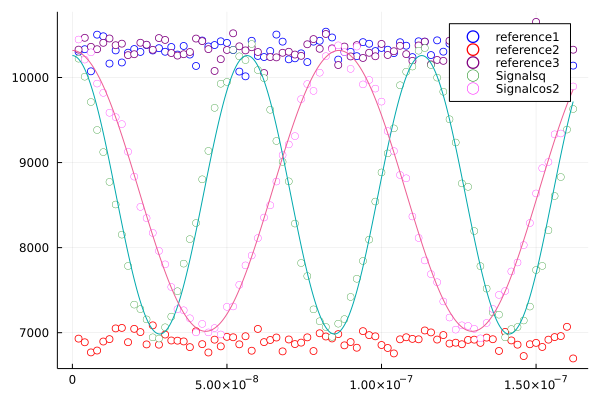

In [23]:
using HDF5
using Plots
import LsqFit as lsq
@. model(x, p) = p[1]*cos(x*p[2]) + p[3]

filename = readdir("misc/07rabi",join = true)[1]

pisq_est = 3e-8 # for square
picos2_est = 5e-8 # for cos2

data = h5open(filename, "r");
pulse_y = h5read(filename,"/GDspulse/Y");
pulse_x = h5read(filename,"/GDspulse/X")[1,:];

p_sq = zeros(3)
max = maximum(pulse_y[3])
min = minimum(pulse_y[3])

p_sq[3] = (max + min)/2
p_sq[1] = (max - min)/2
p_sq[2] = pi/pisq_est

fit = lsq.curve_fit(model, pulse_x, pulse_y[:,3], p_sq)
p_sq = lsq.coef(fit)

p_cos = zeros(3)
max = maximum(pulse_y[3])
min = minimum(pulse_y[3])

p_cos[3] = (max + min)/2
p_cos[1] = (max - min)/2
p_cos[2] = pi/picos2_est

fit = lsq.curve_fit(model, pulse_x, pulse_y[:,5], p_cos)
p_cos = lsq.coef(fit)

Plots.scatter(pulse_x, pulse_y[:,1],label = "reference1",color=:white,
    markerstrokecolor =:blue, markerstrokewidth =1)
Plots.scatter!(pulse_x, pulse_y[:,2],label = "reference2",color=:white,
    markerstrokecolor =:red, markerstrokewidth =1)
Plots.scatter!(pulse_x, pulse_y[:,4],label = "reference3",color=:white,
    markerstrokecolor =:purple,markerstrokewidth =1)
Plots.scatter!(pulse_x, pulse_y[:,3],label = "Signalsq",color=:white, 
    markerstrokecolor =:green,markerstrokewidth =0.4)
Plots.scatter!(pulse_x, pulse_y[:,5],label = "Signalcos2",color=:white, 
    markerstrokecolor =:magenta,markerstrokewidth =0.4)
dx = range(0,pulse_x[end],length = 1000)
Plots.plot!(dx, model(dx , p_sq),label = false)
Plots.plot!(dx, model(dx , p_cos),label = false)

このデータをcos　でフィッティングして、$\pi$パルスの長さ、つまり最初の最下点の位置を決定する。

In [24]:
Ts = pi/p_sq[2]
Tc = pi/p_cos[2]
println("square pi-pulse length is ",Ts*1e9," (ns)!")
println("cos2 pi-pulse length is ",Tc*1e9," (ns)!")

square pi-pulse length is 28.25387142894805 (ns)!
cos2 pi-pulse length is 43.12248137958829 (ns)!


今の場合 矩形波で28ns, 43 nsだったらしい!やったね!

大体あらい測定では$10^4$、真面目な測定は$10^5$、ペーパークオリティは$10^6$だとか?

## Task 5

<img src = "figure/fig14.PNG" width = 400>
これがHahnエコー測定である。 $T_2$ の時定数による減衰と、(あれば$^13\mathrm{C}$)による振動が見える。要はこれを見たい。

<img src = "figure/fig15.PNG" width = 400>
プロトコルは下のような感じ。

amp## は**rabi振動と同じ値を用いる**。これをやらないと何のためにpicalibしたんだか...
ここで、t90 には$\frac{\pi}{2}$分の、**矩形波でのフィッティングによる値**を代入する。プロトコルを見ればわかるが、pulse と書いてあるので、矩形波が出力されているからである。
t180 には、cpの場合は矩形波、cpcos2の場合はcos2の$\pi$パルスの長さを入れる。
最後にttot の値を振ってやれば、実行できる。ttot の開始点の値はかならずt180 を超えねばならないことに注意。